# Préparation des données

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#pd.set_option('max_columns', None)

## Charger la donnée

In [4]:
raw_data = pd.read_csv("input/GSoDI_v5.1_bis.txt", sep = "\t")

In [5]:
# Regarder dans la base
raw_data.head() # afficher les 5 premières lignes


,ID_country_name,ID_country_code,ID_year,ID_country_year,ID_region,ID_subregion,ID_region_name,ID_subregion_name,var1,var2,...,var41,var42,var43,var44,var45,var46,var47,regime_status_name,democratic_performance_name,democratic_performance_numeric
0,United States,2,1975,21975,3.0,9.0,North America,North America,0.739810,0.677210,...,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,NaN,Democracy,High performing democracy,1.0
1,United States,2,1976,21976,3.0,9.0,North America,North America,0.753778,0.689358,...,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,NaN,Democracy,High performing democracy,1.0
2,United States,2,1977,21977,3.0,9.0,North America,North America,0.822535,0.758995,...,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,NaN,Democracy,High performing democracy,1.0
3,United States,2,1978,21978,3.0,9.0,North America,North America,0.821670,0.757696,...,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,NaN,Democracy,High performing democracy,1.0
4,United States,2,1979,21979,3.0,9.0,North America,North America,0.823376,0.758889,...,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,NaN,Democracy,High performing democracy,1.0


In [6]:
# dimension
raw_data.shape

(8533, 58)

In [7]:
len(raw_data["ID_country_year"].unique())

8533

In [8]:
print(raw_data.shape)
raw_data.info()

(8533, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_country_name                 8533 non-null   object 
 1   ID_country_code                 8533 non-null   int64  
 2   ID_year                         8533 non-null   int64  
 3   ID_country_year                 8533 non-null   int64  
 4   ID_region                       8257 non-null   float64
 5   ID_subregion                    7981 non-null   float64
 6   ID_region_name                  8257 non-null   object 
 7   ID_subregion_name               7981 non-null   object 
 8   var1                            8512 non-null   float64
 9   var2                            8512 non-null   float64
 10  var3                            7122 non-null   float64
 11  var4                            7123 non-null   float64
 12  var5                   

## Conversion des types de variables

In [9]:
# récupérer les colonnes à convertir
stringcols = raw_data.select_dtypes(include='object').columns
print(stringcols)


Index(['ID_country_name', 'ID_region_name', 'ID_subregion_name',
       'regime_status_name', 'democratic_performance_name'],
      dtype='object')


In [10]:
# Conversion des types objet en string

raw_data_conv = raw_data.copy()
raw_data_conv[stringcols] = raw_data_conv[stringcols].astype(str)
raw_data_conv[stringcols] = raw_data_conv[stringcols].astype('string')
raw_data_conv[stringcols] = raw_data_conv[stringcols].replace({pd.NA: np.nan})
raw_data_conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_country_name                 8533 non-null   string 
 1   ID_country_code                 8533 non-null   int64  
 2   ID_year                         8533 non-null   int64  
 3   ID_country_year                 8533 non-null   int64  
 4   ID_region                       8257 non-null   float64
 5   ID_subregion                    7981 non-null   float64
 6   ID_region_name                  8533 non-null   string 
 7   ID_subregion_name               8533 non-null   string 
 8   var1                            8512 non-null   float64
 9   var2                            8512 non-null   float64
 10  var3                            7122 non-null   float64
 11  var4                            7123 non-null   float64
 12  var5                            71

In [12]:
raw_data_conv.info() # afficher les variables, leur type, avec présence ou non de valeurs manquates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_country_name                 8533 non-null   string 
 1   ID_country_code                 8533 non-null   int64  
 2   ID_year                         8533 non-null   int64  
 3   ID_country_year                 8533 non-null   int64  
 4   ID_region                       8257 non-null   float64
 5   ID_subregion                    7981 non-null   float64
 6   ID_region_name                  8533 non-null   string 
 7   ID_subregion_name               8533 non-null   string 
 8   var1                            8512 non-null   float64
 9   var2                            8512 non-null   float64
 10  var3                            7122 non-null   float64
 11  var4                            7123 non-null   float64
 12  var5                            71

## Détecter les valeurs manquantes

In [39]:
# nombre de valeurs manquantes
print(raw_data_conv.isnull().sum().sort_values(ascending=False))
# Proportion de valeurs manquantes
raw_data_conv.isnull().mean().sort_values(ascending=False)

var31                             0.472870
var47                             0.446502
var36                             0.446502
var27                             0.446502
var24                             0.446502
var33                             0.301887
var25                             0.297199
var32                             0.296144
var10                             0.294621
var11                             0.294504
var8                              0.294269
var37                             0.285128
var15                             0.282316
var21                             0.282199
var20                             0.282081
var30                             0.254658
var23                             0.194070
var28                             0.185632
var29                             0.179773
var34                             0.178952
var26                             0.169225
var35                             0.168757
democratic_performance_numeric    0.167702
var19      

## Supprimer les valeurs manquantes

In [14]:
# 0 pour supprimer toutes les lignes contenant des valeurs manquantes
data_supp_lignes = raw_data_conv.dropna(axis=0)

print(data_supp_lignes.shape)

# 1 pour supprimer les colonnes contenant des valeurs manquantes

data_supp_col = raw_data_conv.dropna(axis=1)

print(data_supp_col.shape)

(2977, 58)
(8533, 8)


## Imputation

### Manuellement

In [15]:
# récupérer les colonnes à convertir
floatcols = raw_data_conv.select_dtypes(include='float64').columns
print(floatcols)

Index(['ID_region', 'ID_subregion', 'var1', 'var2', 'var3', 'var4', 'var5',
       'var6', 'var7', 'var8', 'var9', 'var10', 'var11', 'var12', 'var13',
       'var14', 'var15', 'var16', 'var17', 'var18', 'var19', 'var20', 'var21',
       'var22', 'var23', 'var24', 'var25', 'var26', 'var27', 'var28', 'var29',
       'var30', 'var31', 'var32', 'var33', 'var34', 'var35', 'var36', 'var37',
       'var38', 'var39', 'var40', 'var41', 'var42', 'var43', 'var44', 'var45',
       'var46', 'var47', 'democratic_performance_numeric'],
      dtype='object')


In [16]:
data_median =  raw_data_conv[floatcols].fillna(raw_data_conv[floatcols].median())
data_moyenne = raw_data_conv[floatcols].fillna(raw_data_conv[floatcols].mean())
data_mode = raw_data_conv[floatcols].fillna(raw_data_conv[floatcols].mode())



In [17]:
print(" les stats descriptives après imputation par la médiane :", data_median.describe())
print(" les stats descriptives après imputation par la moyenne :", data_moyenne.describe())
print(" les stats descriptives après imputation par le mode :", data_mode.describe())
print(" les stats descriptives avant imputation:", raw_data_conv.describe())

 les stats descriptives après imputation par la médiane :          ID_region  ID_subregion         var1         var2         var3  \
count  8533.000000   8533.000000  8533.000000  8533.000000  8533.000000   
mean      3.354506     10.140279     0.484569     0.420766     0.693777   
std       1.960660      5.586270     0.278449     0.278507     0.323531   
min       1.000000      1.000000     0.000000    -0.069277     0.000000   
25%       1.000000      5.000000     0.263688     0.199919     0.666667   
50%       4.000000     11.000000     0.500959     0.437240     0.666667   
75%       5.000000     15.000000     0.734291     0.671336     1.000000   
max       6.000000     19.000000     0.971263     0.905773     1.000000   

              var4         var5         var6         var7         var8  ...  \
count  8533.000000  8533.000000  8533.000000  8533.000000  8533.000000  ...   
mean      0.590907     0.578848     0.589504     0.466073     0.476151  ...   
std       0.168830     0.1656

### Automatisée

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median').fit(raw_data_conv[floatcols])

# mean, most_frequent, median

data_impute = imputer.transform(raw_data_conv[floatcols].values)

data_impute_auto_float = pd.DataFrame(data_impute, columns = floatcols)

print(data_impute_auto_float)
print(data_impute_auto_float.info())

data_impute_auto_float.describe()


      ID_region  ID_subregion      var1      var2      var3      var4  \
0           3.0           9.0  0.739810  0.677210  1.000000  0.834769   
1           3.0           9.0  0.753778  0.689358  1.000000  0.834769   
2           3.0           9.0  0.822535  0.758995  1.000000  0.834769   
3           3.0           9.0  0.821670  0.757696  1.000000  0.834769   
4           3.0           9.0  0.823376  0.758889  1.000000  0.834769   
...         ...           ...       ...       ...       ...       ...   
8528        4.0          11.0  0.563625  0.499823  0.666667  0.588317   
8529        4.0          11.0  0.562800  0.498907  0.666667  0.588317   
8530        4.0          11.0  0.558651  0.494782  0.666667  0.588317   
8531        4.0          11.0  0.553332  0.489436  0.666667  0.588317   
8532        4.0          11.0  0.552947  0.489178  0.666667  0.588317   

          var5      var6      var7  var8  ...     var39     var40     var41  \
0     0.788124  0.969688  1.000000   0.5  ..

/home/ronan/Developpement/Python/TD_MachineLearning/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,ID_region,ID_subregion,var1,var2,var3,var4,var5,var6,var7,var8,...,var39,var40,var41,var42,var43,var44,var45,var46,var47,democratic_performance_numeric
count,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,...,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000
mean,3.354506,10.140279,0.484569,0.420766,0.693777,0.590907,0.578848,0.589504,0.466073,0.476151,...,0.622183,0.590051,0.530164,0.392183,0.408802,0.491775,0.489279,0.442512,0.480522,3.333294
std,1.960660,5.586270,0.278449,0.278507,0.323531,0.168830,0.165653,0.217750,0.298519,0.305136,...,0.251603,0.237496,0.235100,0.376248,0.189921,0.196176,0.214562,0.209109,0.165657,1.395614
min,1.000000,1.000000,0.000000,-0.069277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,5.000000,0.263688,0.199919,0.666667,0.474911,0.474670,0.447025,0.333333,0.500000,...,0.453596,0.449476,0.407987,0.000000,0.283354,0.354614,0.349192,0.309458,0.416667,2.000000
50%,4.000000,11.000000,0.500959,0.437240,0.666667,0.588317,0.579454,0.614731,0.333333,0.500000,...,0.696985,0.651263,0.537040,0.500000,0.377759,0.462085,0.463583,0.415740,0.472222,3.000000
75%,5.000000,15.000000,0.734291,0.671336,1.000000,0.683604,0.665256,0.740793,0.666667,0.500000,...,0.795520,0.759858,0.679248,0.500000,0.519228,0.594787,0.593833,0.572419,0.500000,5.000000
max,6.000000,19.000000,0.971263,0.905773,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [20]:
data_nettoye = pd.concat([raw_data["ID_country_year"], data_impute_auto_string, data_impute_auto_float], axis=1, join="outer") 
data_nettoye.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_country_year                 8533 non-null   int64  
 1   ID_country_name                 8533 non-null   string 
 2   ID_region_name                  8533 non-null   string 
 3   ID_subregion_name               8533 non-null   string 
 4   regime_status_name              8533 non-null   string 
 5   democratic_performance_name     8533 non-null   string 
 6   ID_region                       8533 non-null   float64
 7   ID_subregion                    8533 non-null   float64
 8   var1                            8533 non-null   float64
 9   var2                            8533 non-null   float64
 10  var3                            8533 non-null   float64
 11  var4                            8533 non-null   float64
 12  var5                            85

## Sélection des variables

In [21]:
features_float = ['var1', 'var2', 'var3', 'var4', 'var5',
       'var6', 'var7', 'var8', 'var9', 'var10', 'var11', 'var12', 'var13',
       'var14', 'var15', 'var16', 'var17', 'var18', 'var19', 'var20', 'var21',
       'var22', 'var23', 'var24', 'var25', 'var26', 'var27', 'var28', 'var29',
       'var30', 'var31', 'var32', 'var33', 'var34', 'var35', 'var36', 'var37',
       'var38', 'var39', 'var40', 'var41', 'var42', 'var43', 'var44', 'var45',
       'var46', 'var47', 'democratic_performance_numeric']

data_nettoye[features_float].head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var39,var40,var41,var42,var43,var44,var45,var46,var47,democratic_performance_numeric
0,0.739810,0.677210,1.0,0.834769,0.788124,0.969688,1.0,0.5,1.0,0.5,...,0.743978,0.793592,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,0.472222,1.0
1,0.753778,0.689358,1.0,0.834769,0.788124,0.969688,1.0,0.5,1.0,0.5,...,0.743978,0.793592,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,0.472222,1.0
2,0.822535,0.758995,1.0,0.834769,0.788124,0.969688,1.0,0.5,1.0,0.5,...,0.743978,0.793592,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,0.472222,1.0
3,0.821670,0.757696,1.0,0.834769,0.788124,0.969688,1.0,0.5,1.0,0.5,...,0.743978,0.793592,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,0.472222,1.0
4,0.823376,0.758889,1.0,0.834769,0.788124,0.969688,1.0,0.5,1.0,0.5,...,0.743978,0.793592,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,0.472222,1.0


In [22]:
features_string = ['ID_region_name', 'regime_status_name', 'democratic_performance_name']

data_nettoye[features_string].head()


print(data_nettoye[features_string].value_counts())

print(data_nettoye['ID_region_name'].value_counts())

print(data_nettoye['regime_status_name'].value_counts())

data_nettoye['democratic_performance_name'].value_counts()


ID_region_name           regime_status_name    democratic_performance_name   
Africa                   Authoritarian Regime  Authoritarian Regime              1369
Europe                   Democracy             High performing democracy          683
                                               Mid-range performing democracy     669
Asia/Pacific             Authoritarian Regime  Authoritarian Regime               597
Middle East              Authoritarian Regime  Authoritarian Regime               494
Latin America/Caribbean  Democracy             Mid-range performing democracy     470
Africa                   Democracy             Weak democracy                     324
Asia/Pacific             Democracy             Mid-range performing democracy     308
Africa                   nan                   nan                                296
                         Hybrid Regime         Hybrid Regime                      283
nan                      nan                   nan            

democratic_performance_name
Authoritarian Regime              2866
Mid-range performing democracy    1723
nan                               1431
High performing democracy          924
Weak democracy                     906
Hybrid Regime                      683
Name: count, dtype: Int64

In [23]:
#data = data.drop(columns=['wpt_name', 'recorded_by', 'num_private', 'region', 'payment', 'source_type', 'source_class',
 #                         'extraction_type_class', 'extraction_type_group', 'quantity_group', 'quality_group',
  #                        'waterpoint_type_group', 'funder', 'installer', 'id', 'subvillage', 'lga', 'ward',
   #                       'date_recorded', 'scheme_name'])
data_nettoye_select = data_nettoye[features_string + features_float]

print(data_nettoye_select.shape)
data_nettoye_select.head()


(8533, 51)


,ID_region_name,regime_status_name,democratic_performance_name,var1,var2,var3,var4,var5,var6,var7,...,var39,var40,var41,var42,var43,var44,var45,var46,var47,democratic_performance_numeric
0,North America,Democracy,High performing democracy,0.739810,0.677210,1.0,0.834769,0.788124,0.969688,1.0,...,0.743978,0.793592,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,0.472222,1.0
1,North America,Democracy,High performing democracy,0.753778,0.689358,1.0,0.834769,0.788124,0.969688,1.0,...,0.743978,0.793592,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,0.472222,1.0
2,North America,Democracy,High performing democracy,0.822535,0.758995,1.0,0.834769,0.788124,0.969688,1.0,...,0.743978,0.793592,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,0.472222,1.0
3,North America,Democracy,High performing democracy,0.821670,0.757696,1.0,0.834769,0.788124,0.969688,1.0,...,0.743978,0.793592,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,0.472222,1.0
4,North America,Democracy,High performing democracy,0.823376,0.758889,1.0,0.834769,0.788124,0.969688,1.0,...,0.743978,0.793592,0.950822,1.0,0.650701,0.81656,0.917181,0.772996,0.472222,1.0


In [24]:
data_nettoye_select["democratic_performance_name"].value_counts()

democratic_performance_name
Authoritarian Regime              2866
Mid-range performing democracy    1723
nan                               1431
High performing democracy          924
Weak democracy                     906
Hybrid Regime                      683
Name: count, dtype: Int64

In [25]:
data_nettoye_select["regime_status_name"].value_counts().sort_index()

regime_status_name
Authoritarian Regime    2866
Democracy               3553
Hybrid Regime            683
nan                     1431
Name: count, dtype: Int64

## Champ de travail

In [26]:
data_nettoye_select_champ = data_nettoye_select[data_nettoye_select["ID_region_name"].isin(["Africa", "Asia/Pacific", "Latin America/Caribbean", "Middle East"])]

In [27]:
#titanic[titanic["Age"] > 35]
#titanic[titanic["Pclass"].isin(["Africa", "Asia/Pacific", "Latin America/Caribbean", "Middle East"])]
#titanic[titanic["Age"].notna()]

## Recodage des variables

In [28]:
def regime_status_name(df):
    code = {'Authoritarian Regime':1,
            'Democracy':2,
            'Hybrid Regime':3            
            }

    df.loc[:,'regime_status_name_rec'] = df['regime_status_name'].map(code) # appliquer le schéma de recodage 
    df['regime_status_name_rec'] = df['regime_status_name_rec'].fillna(0)
    return df

data_nettoye_select_champ_rec = regime_status_name(data_nettoye_select_champ)

print(data_nettoye_select_champ_rec["regime_status_name"].value_counts().sort_index())
print(data_nettoye_select_champ_rec["regime_status_name_rec"].value_counts().sort_index())
data_nettoye_select_champ_rec["regime_status_name_rec"].isnull().sum()

regime_status_name
Authoritarian Regime    2666
Democracy               2016
Hybrid Regime            580
nan                      832
Name: count, dtype: Int64
regime_status_name_rec
0.0     832
1.0    2666
2.0    2016
3.0     580
Name: count, dtype: int64


/tmp/ipykernel_22041/991024999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'regime_status_name_rec'] = df['regime_status_name'].map(code) # appliquer le schéma de recodage
/tmp/ipykernel_22041/991024999.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['regime_status_name_rec'] = df['regime_status_name_rec'].fillna(0)


0

### Données propre

In [29]:
data_propre = data_nettoye_select_champ.copy()

# Analyse des données

## Statistiques descriptives

### Variables quantitatives

In [30]:
data_propre[features_float].describe()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var39,var40,var41,var42,var43,var44,var45,var46,var47,democratic_performance_numeric
count,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,...,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000
mean,0.402873,0.339063,0.628815,0.543311,0.528769,0.540459,0.402855,0.427141,0.486708,0.462832,...,0.571047,0.542394,0.476589,0.299967,0.359805,0.439356,0.429047,0.387983,0.443762,3.746144
std,0.260114,0.260178,0.339846,0.142779,0.141972,0.210507,0.264827,0.305094,0.321833,0.348576,...,0.250775,0.236144,0.210785,0.338381,0.163948,0.161384,0.177807,0.180066,0.135446,1.251310
min,0.000000,-0.069277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.213016,0.148883,0.333333,0.438292,0.429588,0.391431,0.333333,0.000000,0.333333,0.000000,...,0.372410,0.358903,0.338606,0.000000,0.249618,0.330220,0.306461,0.268881,0.333333,3.000000
50%,0.394838,0.331018,0.666667,0.582489,0.567269,0.600850,0.333333,0.500000,0.666667,0.500000,...,0.688226,0.643099,0.529836,0.000000,0.362904,0.449679,0.456241,0.397401,0.472222,4.000000
75%,0.616921,0.553133,1.000000,0.627471,0.606515,0.676062,0.666667,0.500000,0.666667,0.500000,...,0.756106,0.707948,0.603602,0.500000,0.439053,0.528436,0.528194,0.491552,0.472222,5.000000
max,0.971263,0.905773,1.000000,0.891789,0.873285,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.987704,1.000000,0.993579,1.000000,1.000000,0.929328,0.942144,0.965632,1.000000,5.000000


#### Table de corrélation

In [31]:
# calcul de la table de corrélation

corr = data_propre[['var1', 'var2', 'var3', 'var4', 'var5',
       'var6', 'var7', 'var8', 'var9', 'var10']].corr() #test de correlation sur les 10 premières variables

In [32]:
corr

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
var1,1.000000,0.999987,0.833783,0.603669,0.618354,0.706837,0.738793,0.470316,0.756121,0.572445
var2,0.999987,1.000000,0.833777,0.603695,0.618405,0.706836,0.738737,0.470327,0.756046,0.572462
var3,0.833783,0.833777,1.000000,0.482867,0.501215,0.581953,0.663240,0.397614,0.691331,0.489191
var4,0.603669,0.603695,0.482867,1.000000,0.933620,0.701499,0.602876,0.392847,0.583708,0.381650
var5,0.618354,0.618405,0.501215,0.933620,1.000000,0.696608,0.583113,0.373176,0.574196,0.384162
var6,0.706837,0.706836,0.581953,0.701499,0.696608,1.000000,0.708514,0.531496,0.738661,0.547165
var7,0.738793,0.738737,0.663240,0.602876,0.583113,0.708514,1.000000,0.582373,0.804530,0.612334
var8,0.470316,0.470327,0.397614,0.392847,0.373176,0.531496,0.582373,1.000000,0.586859,0.626558
var9,0.756121,0.756046,0.691331,0.583708,0.574196,0.738661,0.804530,0.586859,1.000000,0.687224
var10,0.572445,0.572462,0.489191,0.381650,0.384162,0.547165,0.612334,0.626558,0.687224,1.000000


### Variables qualitatives

In [33]:
data_propre[features_string].describe()

,ID_region_name,regime_status_name,democratic_performance_name
count,6094,6094,6094
unique,4,4,6
top,Africa,Authoritarian Regime,Authoritarian Regime
freq,2507,2666,2666


# Visualisation 

### Variables quantitatives

array([[<Axes: title={'center': 'var1'}>,
        <Axes: title={'center': 'var2'}>,
        <Axes: title={'center': 'var3'}>,
        <Axes: title={'center': 'var4'}>,
        <Axes: title={'center': 'var5'}>,
        <Axes: title={'center': 'var6'}>,
        <Axes: title={'center': 'var7'}>],
       [<Axes: title={'center': 'var8'}>,
        <Axes: title={'center': 'var9'}>,
        <Axes: title={'center': 'var10'}>,
        <Axes: title={'center': 'var11'}>,
        <Axes: title={'center': 'var12'}>,
        <Axes: title={'center': 'var13'}>,
        <Axes: title={'center': 'var14'}>],
       [<Axes: title={'center': 'var15'}>,
        <Axes: title={'center': 'var16'}>,
        <Axes: title={'center': 'var17'}>,
        <Axes: title={'center': 'var18'}>,
        <Axes: title={'center': 'var19'}>,
        <Axes: title={'center': 'var20'}>,
        <Axes: title={'center': 'var21'}>],
       [<Axes: title={'center': 'var22'}>,
        <Axes: title={'center': 'var23'}>,
        <Axes: ti

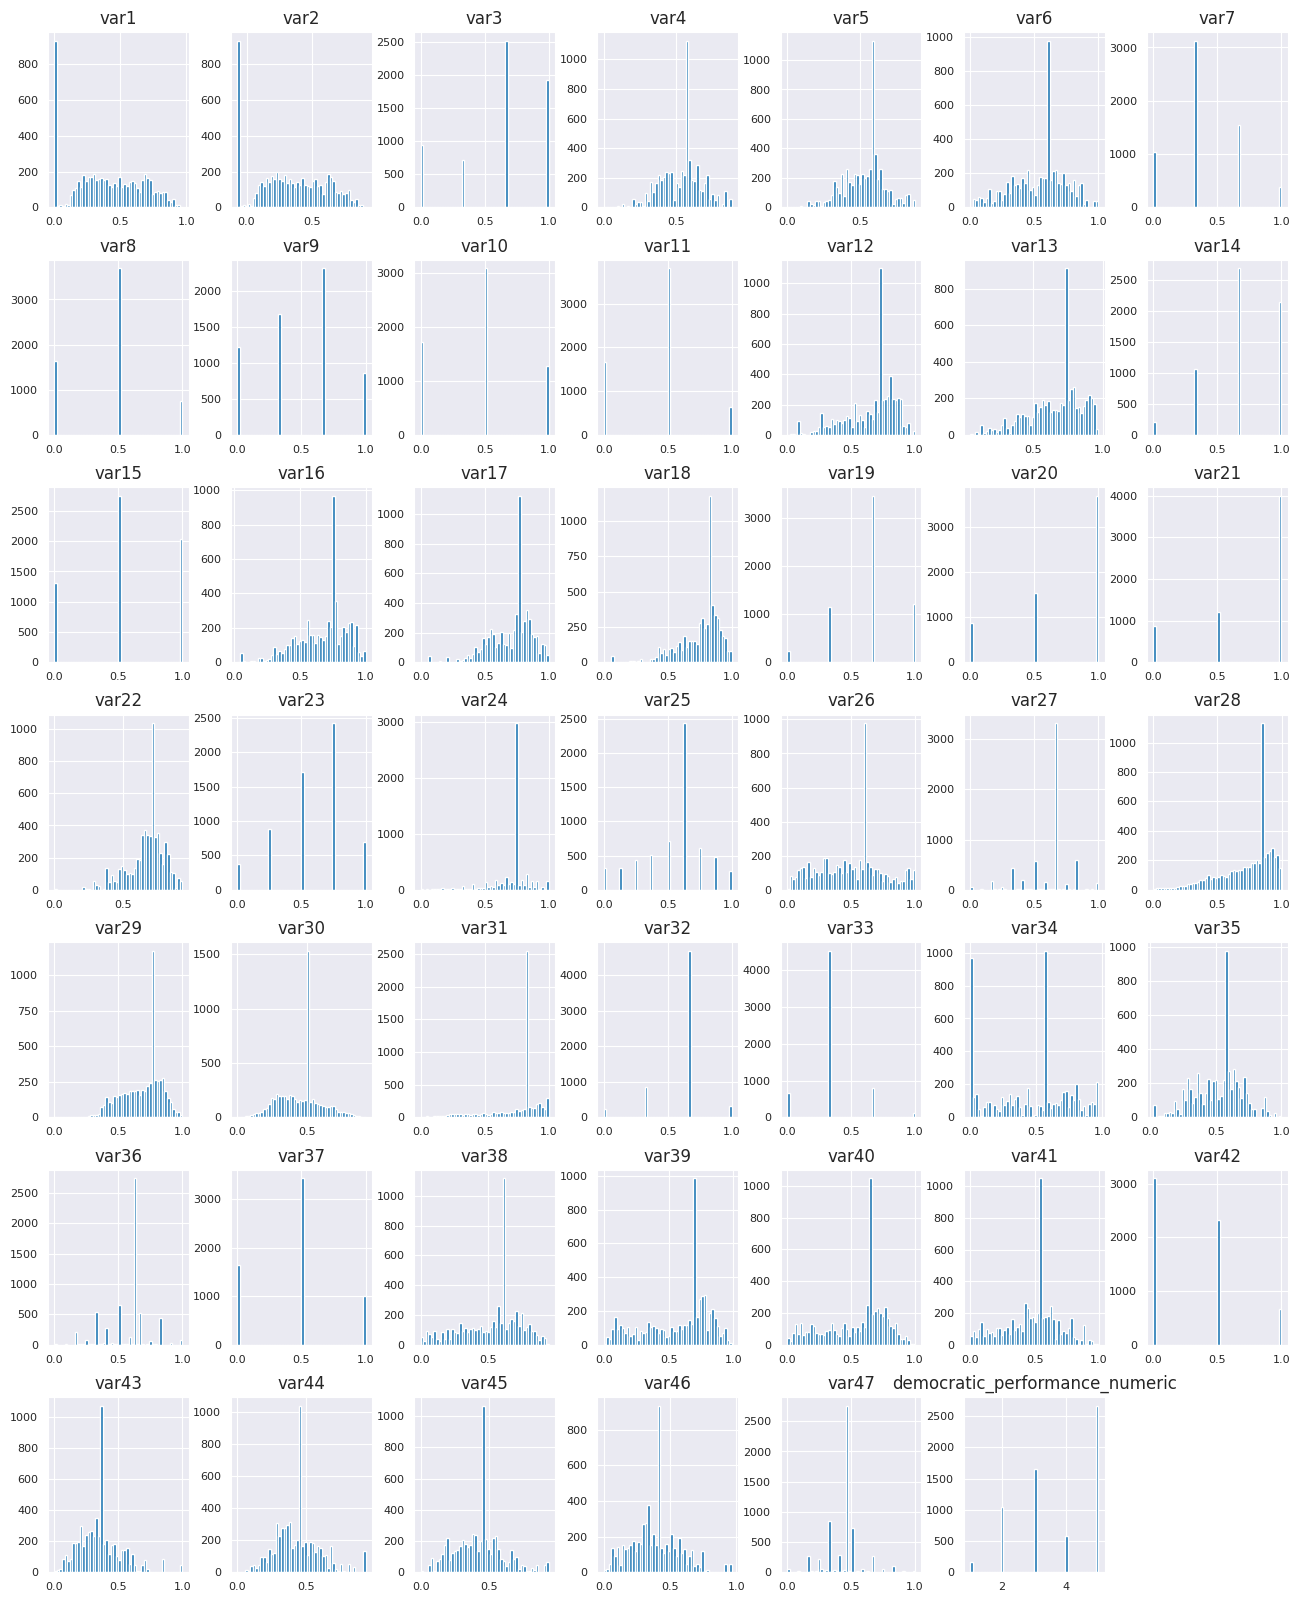

In [34]:
data_propre[features_float].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

#### graphique des correlations

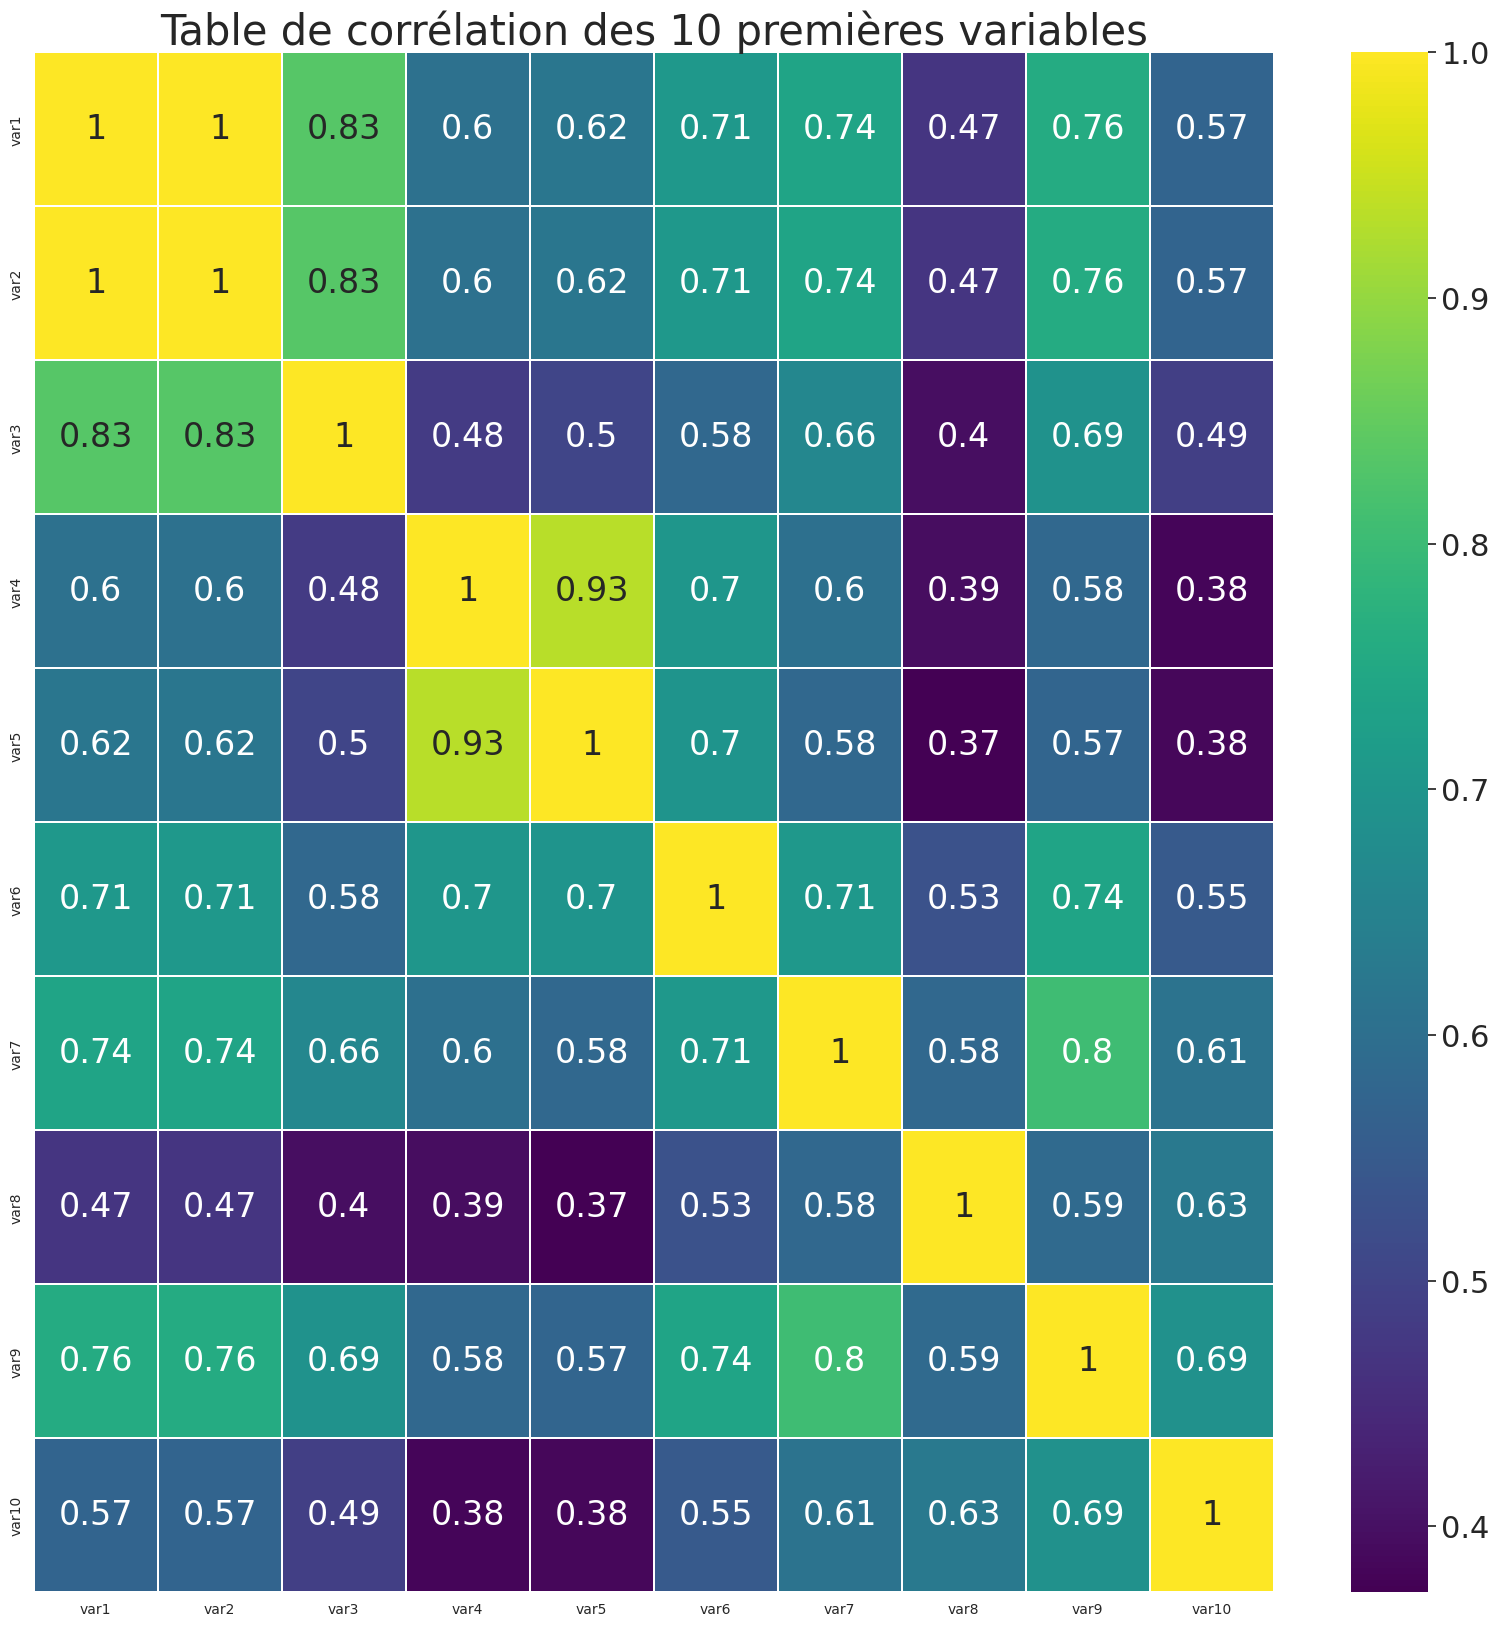

In [35]:
# graphique des correlations
plt.figure(figsize=(20, 20))

plt.title("Table de corrélation des 10 premières variables", fontsize=30)

sns.set(style="darkgrid", font_scale=2)
plt.xlabel("",fontsize=20)
plt.ylabel("",fontsize=20)

sns.heatmap(corr, 
            cmap='viridis',
            cbar=True,
            #vmax=1.0, vmin=-1.0,
            linewidths=0.3,
            annot=True,
            #annot_kws={"size": 8}, square=True
           );

### Variables qualitatives

<Axes: title={'center': 'Fréquence de la performance démocratique'}, xlabel='Performance démocratique', ylabel='Fréquence'>

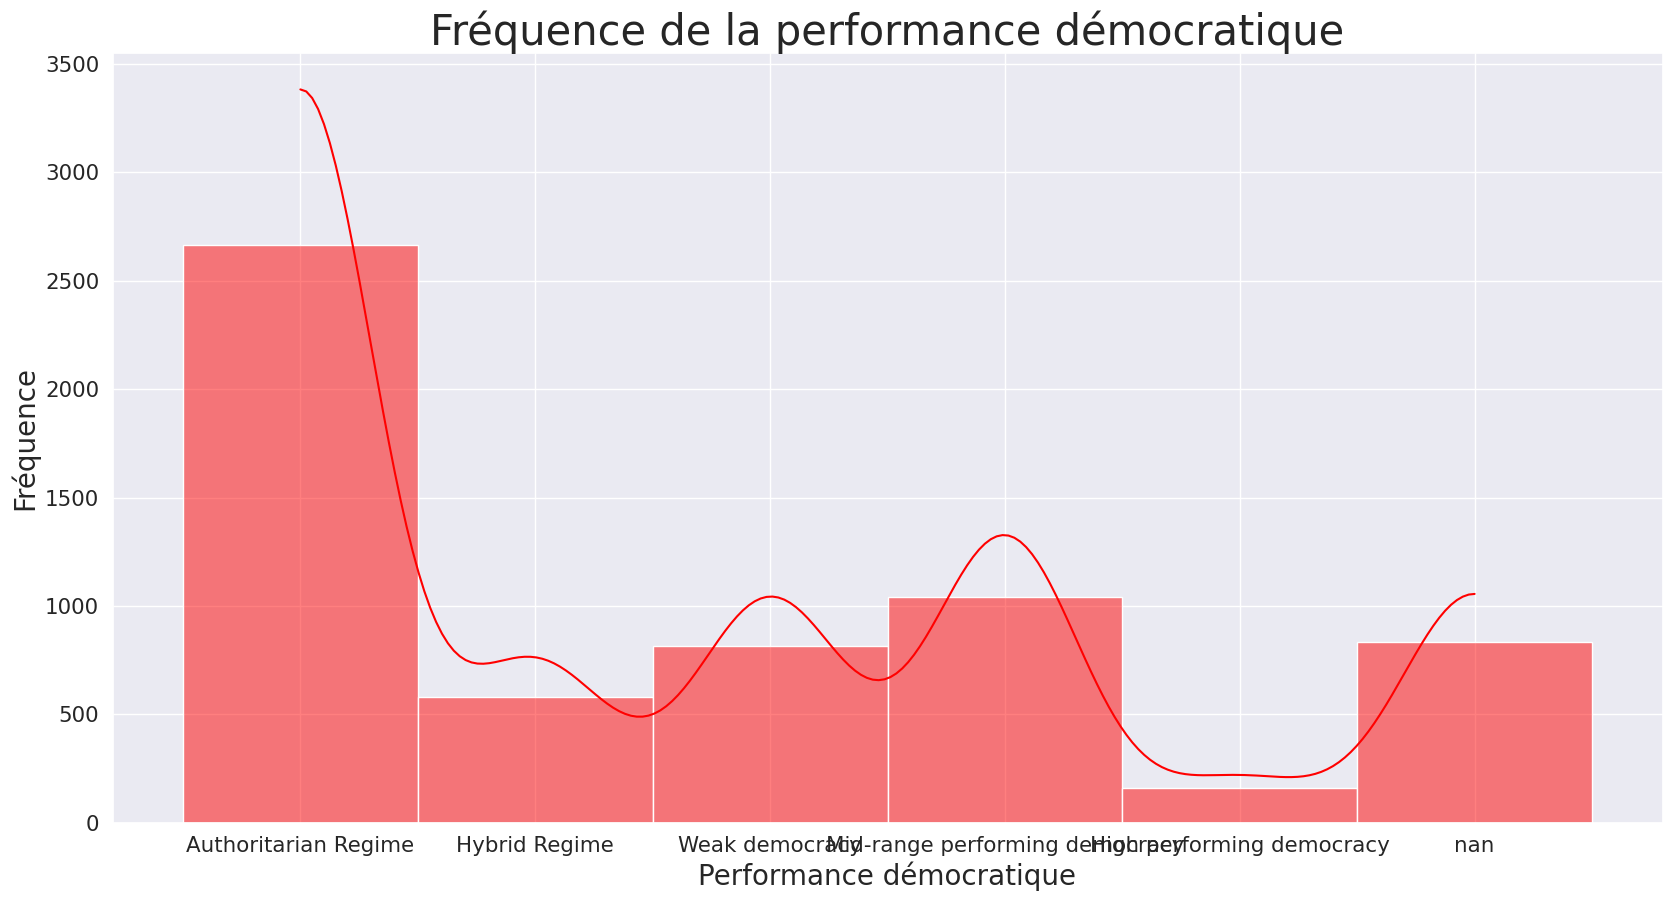

In [36]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(20, 10))
plt.title('Fréquence de la performance démocratique', fontsize=30)
plt.xlabel("Performance démocratique", fontsize=20)
plt.ylabel("Fréquence", fontsize=20)
sns.histplot(data_propre['democratic_performance_name'], bins = 10, kde=True,  color='red')

### Croisement quali et quanti

<Axes: title={'center': 'Performance démocratique par var1'}, xlabel='Performance démocratique', ylabel='var1'>

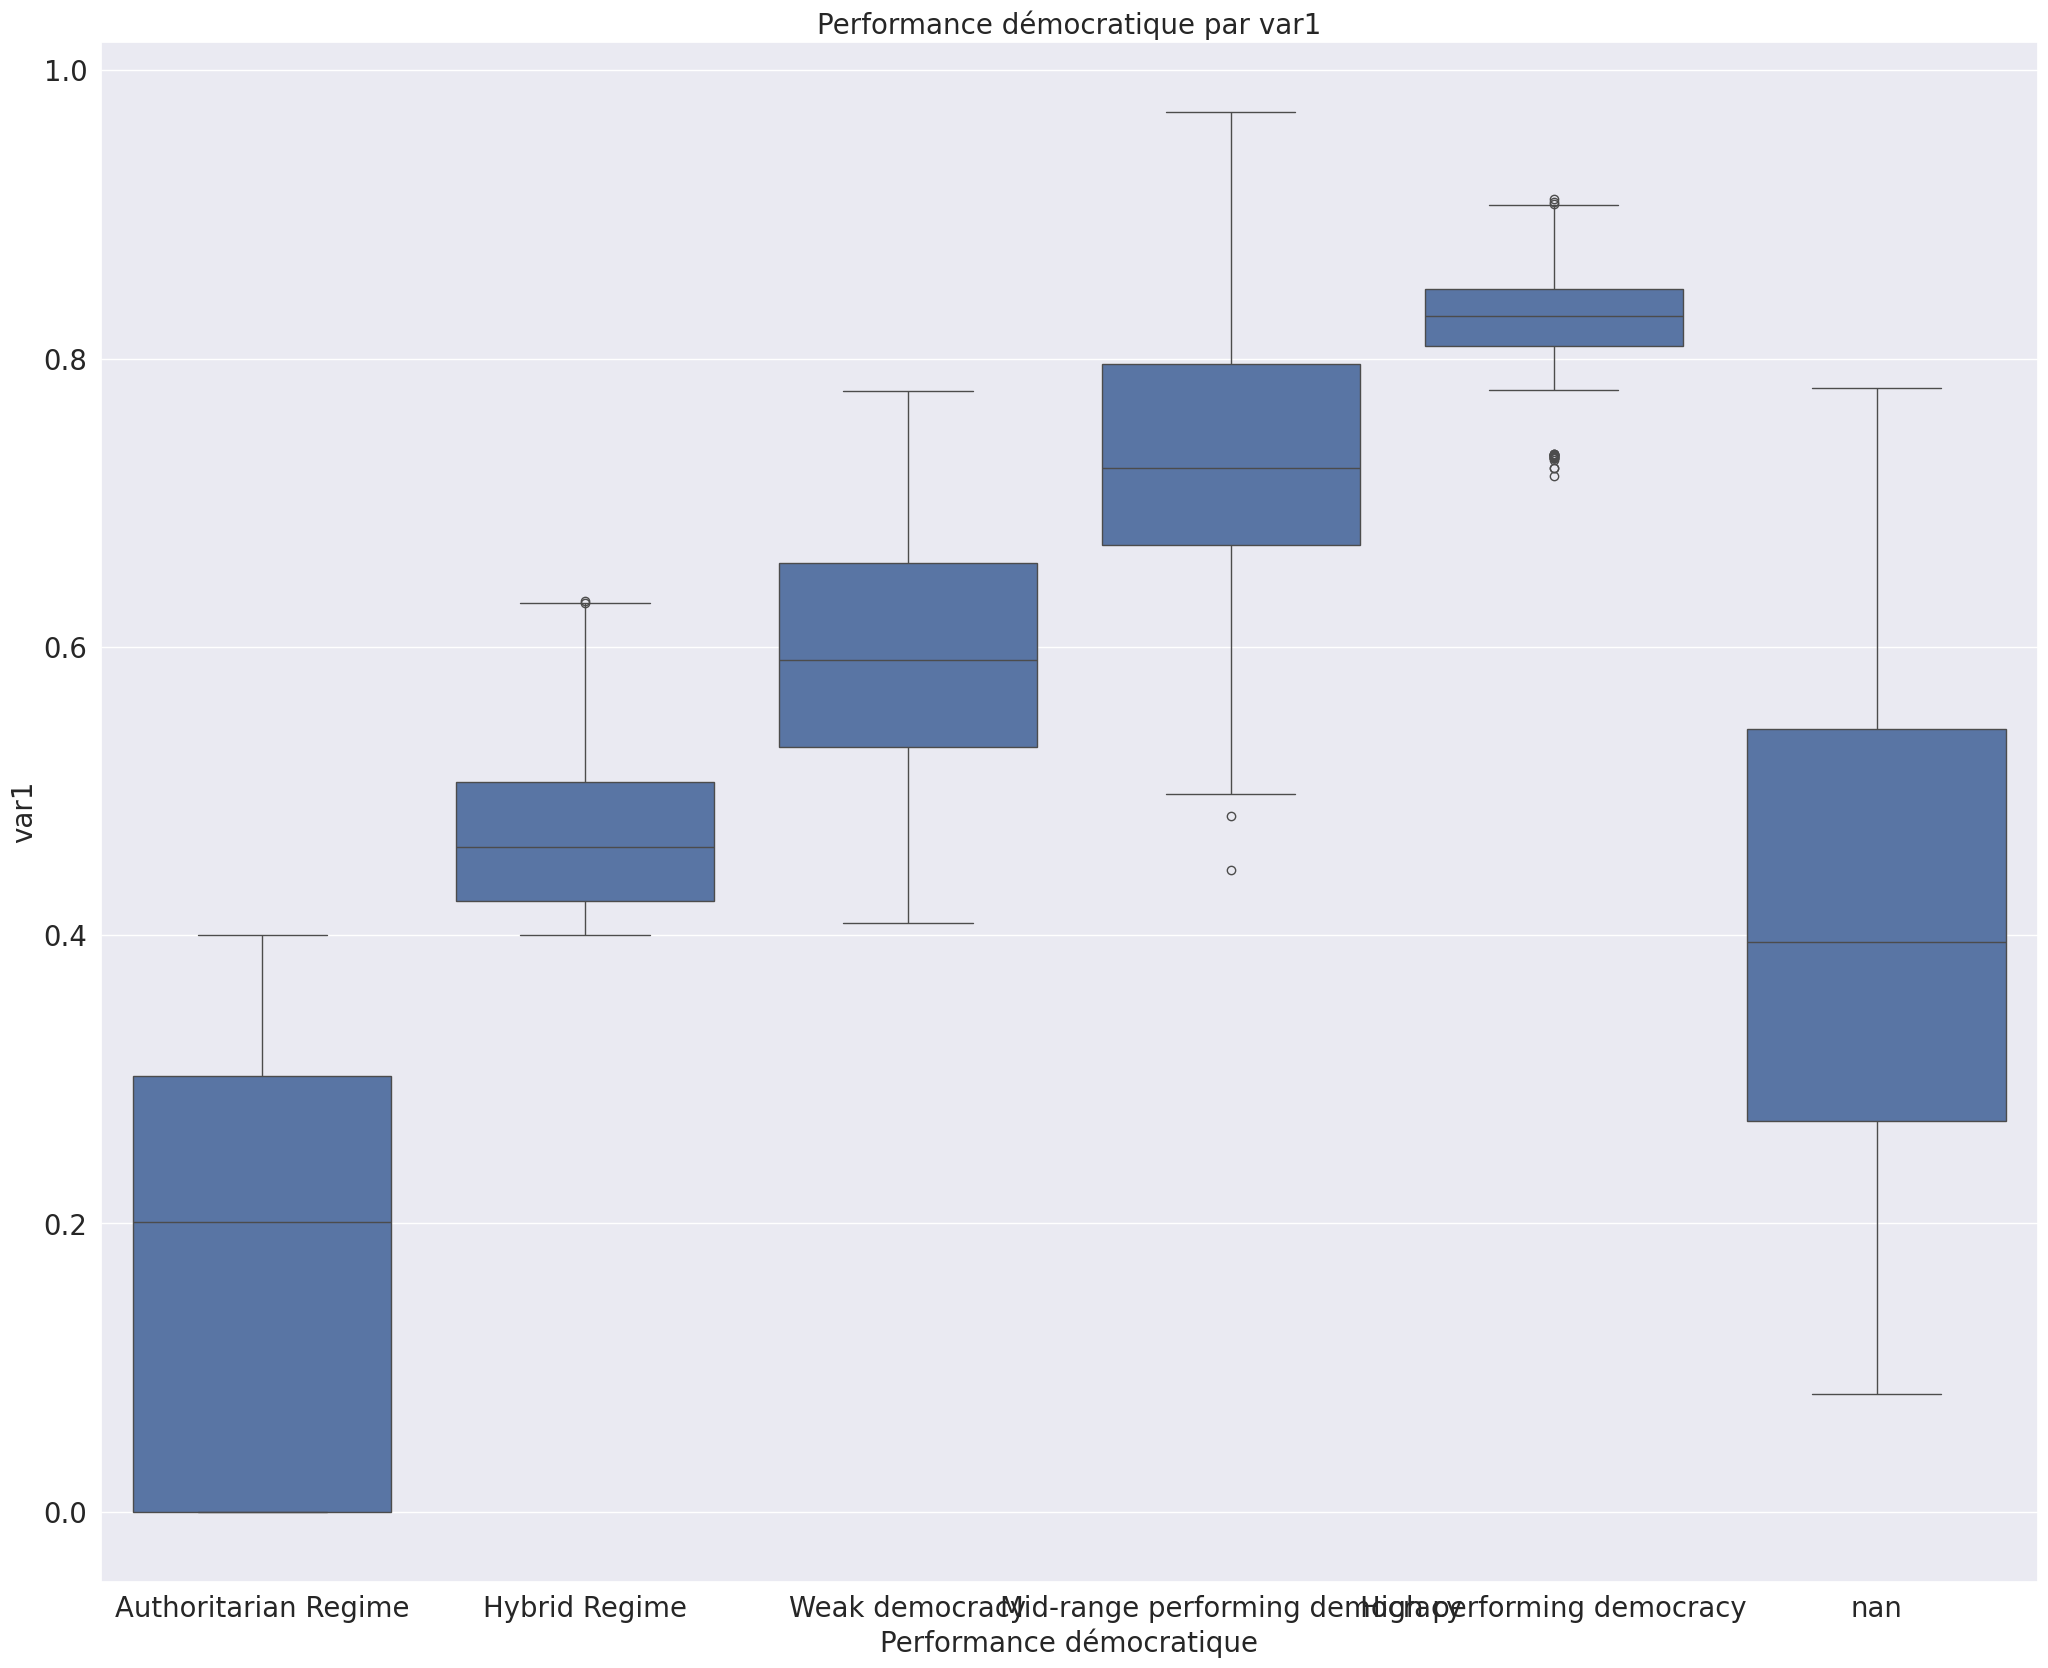

In [37]:
plt.figure(figsize=(25, 20))
sns.set(style="darkgrid", font_scale=1.8)
plt.title("Performance démocratique par var1", fontsize=20)
plt.xlabel("Performance démocratique", fontsize=20)
plt.ylabel("var1", fontsize=20)
sns.boxplot(x='democratic_performance_name', y='var1', data=data_propre)

# Sauvegarde

In [38]:
data_propre.to_csv('output/GSoDI_v5.1_bis_cleaned.csv', encoding='utf-8')

OSError: Cannot save file into a non-existent directory: 'output'